In [1]:
import pandas as pd
df = pd.read_csv('sales_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,Flatscreen TV,3,84.41,2023-01-01,"570 Main St, New York, NY"
1,176559,Wired Headphones,2,1593.83,2023-01-02,"242 Main St, Portland, OR"
2,176560,Macbook Pro Laptop,2,790.31,2023-01-03,"191 Main St, Los Angeles, CA"
3,176561,Flatscreen TV,4,1274.87,2023-01-04,"453 Main St, New York, NY"
4,176562,Google Phone,2,2270.37,2023-01-05,"933 Main St, Portland, OR"


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

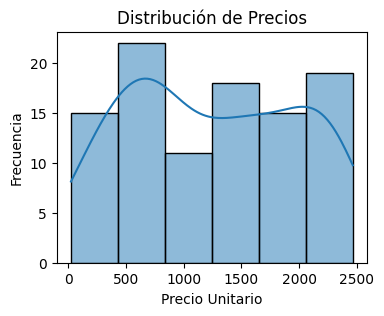

In [5]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Price Each'], bins=6, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.show()

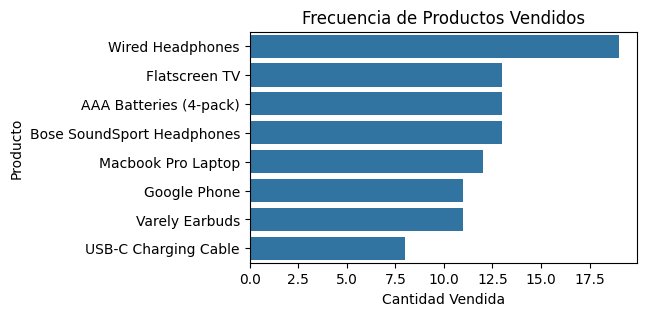

In [6]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index)
plt.title('Frecuencia de Productos Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.show()

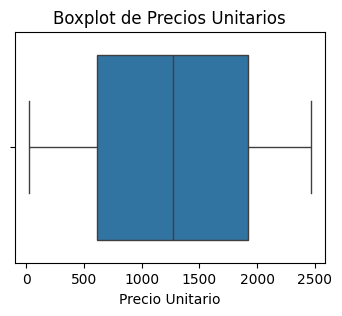

In [7]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Price Each'])
plt.title('Boxplot de Precios Unitarios')
plt.xlabel('Precio Unitario')
plt.show()

In [8]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
city_counts = df['City'].value_counts()
print(city_counts)

City
Los Angeles      15
Seattle          14
New York         12
Miami            11
Portland         10
San Francisco     9
Dallas            8
Boston            7
Chicago           7
Phoenix           7
Name: count, dtype: int64


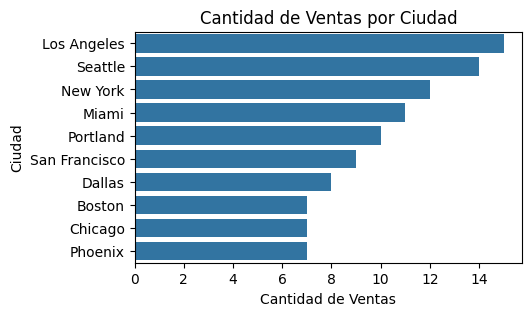

In [9]:
plt.figure(figsize=(5, 3))
city_order = df['City'].value_counts().index
sns.countplot(data=df, y='City', order=city_order)
plt.title('Cantidad de Ventas por Ciudad')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Ciudad')
plt.show()

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,Flatscreen TV,3,84.41,2023-01-01,"570 Main St, New York, NY",New York,1
1,176559,Wired Headphones,2,1593.83,2023-01-02,"242 Main St, Portland, OR",Portland,1
2,176560,Macbook Pro Laptop,2,790.31,2023-01-03,"191 Main St, Los Angeles, CA",Los Angeles,1
3,176561,Flatscreen TV,4,1274.87,2023-01-04,"453 Main St, New York, NY",New York,1
4,176562,Google Phone,2,2270.37,2023-01-05,"933 Main St, Portland, OR",Portland,1


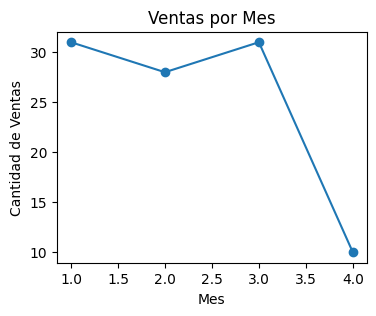

In [14]:
monthly_sales = df['Month'].value_counts().sort_index()
plt.figure(figsize=(4, 3))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.show()